# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | at taj
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | buta
Processing Record 9 of Set 1 | shanhecun
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | manaure
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | sandnessjoen
Processing Record 14 of Set 1 | christchurch
Processing Record 15 of Set 1 | pangody
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | bardai
Processing Record 21 of Set 1 | atafu village
Processing Record 22 of Set 1 | queenstown
Processing Record 23

Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | ilhabela
Processing Record 43 of Set 4 | bahia de kino
Processing Record 44 of Set 4 | machico
Processing Record 45 of Set 4 | olonkinbyen
Processing Record 46 of Set 4 | freetown
Processing Record 47 of Set 4 | puerto ayacucho
Processing Record 48 of Set 4 | massawa
Processing Record 49 of Set 4 | okola
Processing Record 0 of Set 5 | nar'yan-mar
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | uttaradit
Processing Record 4 of Set 5 | gislaved
Processing Record 5 of Set 5 | tazovsky
Processing Record 6 of Set 5 | labytnangi
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | ayr
Processing Record 9 of Set 5 | yafran
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | aldama
Processing Record 12 of Set 5 | edmundston
Processing Record 13 of Set 5 | talara
Processing Record 14 of Set 5 | praia da vitoria
Proc

Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | bikaner
Processing Record 35 of Set 8 | zangguy
City not found. Skipping...
Processing Record 36 of Set 8 | arraial do cabo
Processing Record 37 of Set 8 | peniche
Processing Record 38 of Set 8 | sakleshpur
Processing Record 39 of Set 8 | suva
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | kyabram
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | sechura
Processing Record 44 of Set 8 | sinop
Processing Record 45 of Set 8 | minas de marcona
Processing Record 46 of Set 8 | nanma
Processing Record 47 of Set 8 | yuxi
Processing Record 48 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 49 of Set 8 | callao
Processing Record 0 of Set 9 | poxoreo
Processing Record 1 of Set 9 | naze
Processing Record 2 of Set 9 | figuig (centre)
Processing Record 3 of Set 9 | tazacorte
Processing Record 4 of Set 9 | baku
Processing Recor

Processing Record 22 of Set 12 | trashi yangtse
Processing Record 23 of Set 12 | gambiran satu
Processing Record 24 of Set 12 | quartu sant'elena
Processing Record 25 of Set 12 | sanctuary point
Processing Record 26 of Set 12 | tashtagol
Processing Record 27 of Set 12 | harnai
Processing Record 28 of Set 12 | peace river
Processing Record 29 of Set 12 | chifeng
Processing Record 30 of Set 12 | holly
Processing Record 31 of Set 12 | bafra
Processing Record 32 of Set 12 | nema
Processing Record 33 of Set 12 | caetes
Processing Record 34 of Set 12 | maindargi
Processing Record 35 of Set 12 | timimoun
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | jose mariano jimenez
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
#"Max Temp" is in calvin, converting to celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"]-273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,76,75,7.72,AR,1699711368
1,avarua,-21.2078,-159.7750,24.03,88,100,0.51,CK,1699711368
2,grytviken,-54.2811,-36.5092,4.22,85,30,1.19,GS,1699711369
3,at taj,24.2049,23.2857,29.42,22,100,1.95,LY,1699711370
4,anadyr,64.7500,177.4833,-15.72,78,20,5.00,RU,1699711370


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,76,75,7.72,AR,1699711368
1,avarua,-21.2078,-159.7750,24.03,88,100,0.51,CK,1699711368
2,grytviken,-54.2811,-36.5092,4.22,85,30,1.19,GS,1699711369
3,at taj,24.2049,23.2857,29.42,22,100,1.95,LY,1699711370
4,anadyr,64.7500,177.4833,-15.72,78,20,5.00,RU,1699711370


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#Converting the Unix Datatime stamp to month/days/years and time so will have the correct date in the graph titles no matter when the code is run
#Looked up how to do this on Stack Overflow
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = 's')
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"])
city_data_df["Date y/m/d"] = pd.to_datetime(city_data_df["Date"]).dt.date
current_date = city_data_df["Date y/m/d"].iloc[0]
current_date
day = current_date.day
month = current_date.month
year = current_date.year

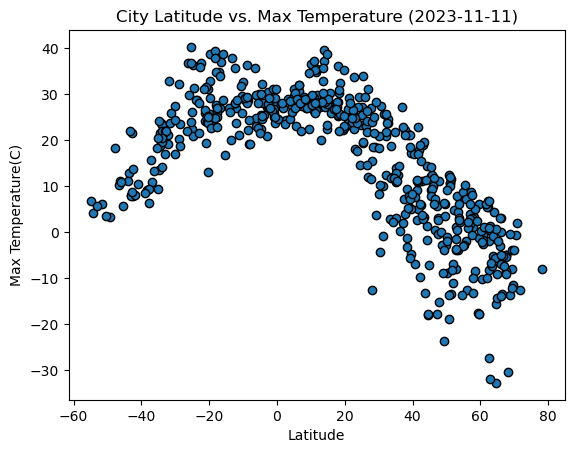

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Latitude vs. Max Temperature ({year}-{month}-{day})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

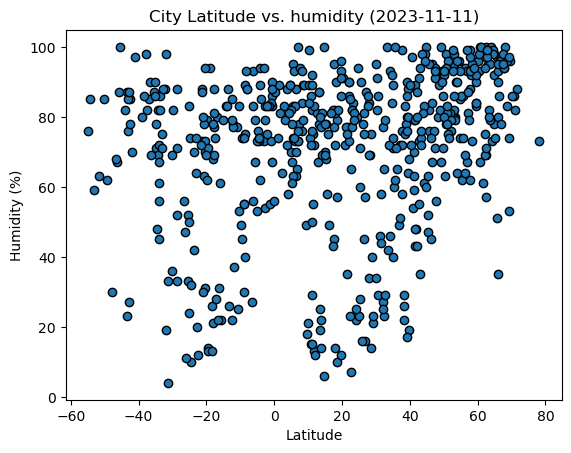

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
lat_vs_temp_plot = plt.scatter(lat, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. humidity ({year}-{month}-{day})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

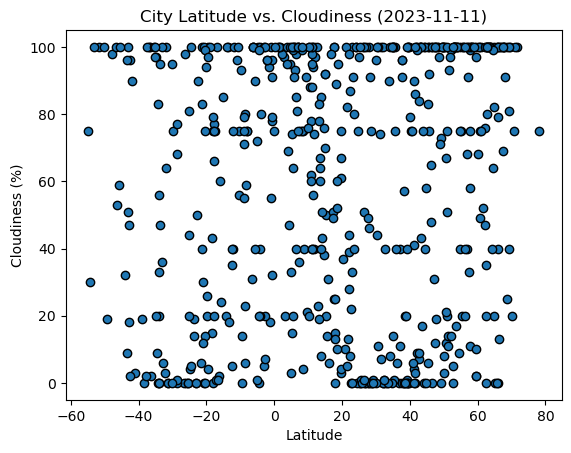

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
lat_vs_temp_plot = plt.scatter(lat, cloudiness, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({year}-{month}-{day})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

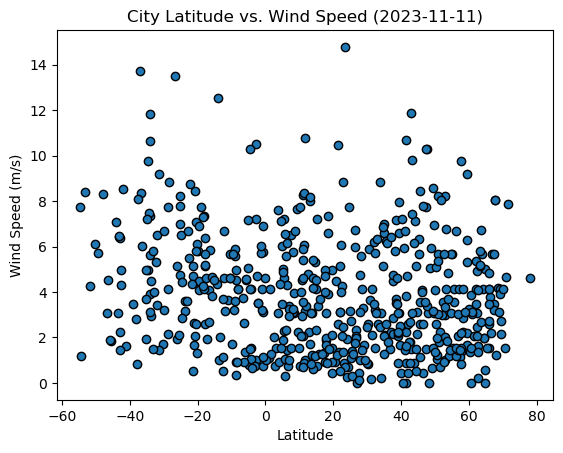

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
lat_vs_temp_plot = plt.scatter(lat, wind_speed, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({year}-{month}-{day})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE